In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df=pd.read_csv('/content/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54240,2015-02-15,MountGinini,9.0,17.3,21.4,NaN,NaN,WSW,37.0,WSW,...,98.0,82.0,NaN,NaN,NaN,NaN,12.3,15.1,Yes,No
54241,2015-02-16,MountGinini,10.3,23.7,0.0,NaN,NaN,WNW,28.0,WNW,...,94.0,59.0,NaN,NaN,NaN,NaN,13.8,20.8,No,No
54242,2015-02-17,MountGinini,12.0,22.0,0.4,NaN,NaN,SSW,37.0,NE,...,94.0,63.0,NaN,NaN,NaN,NaN,13.8,19.5,No,Yes
54243,2015-02-18,MountGinini,11.5,19.0,3.6,NaN,NaN,ENE,46.0,E,...,98.0,62.0,NaN,NaN,NaN,NaN,12.4,17.8,Yes,No


In [ ]:
numerical_cols=df.select_dtypes(include=np.number).columns
df[numerical_cols]=df[numerical_cols].fillna(df[numerical_cols].mean())
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,5847
WindGustSpeed,0
WindDir9am,6243


In [ ]:
categorical_cols=df.select_dtypes(include='object').columns
df[categorical_cols]=df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.400000,22.900000,0.600000,5.52876,7.568706,W,44.000000,W,...,71.000000,22.000000,1007.700000,1007.100000,8.00000,4.487216,16.900000,21.800000,No,No
1,2008-12-02,Albury,7.400000,25.100000,0.000000,5.52876,7.568706,WNW,44.000000,NNW,...,44.000000,25.000000,1010.600000,1007.800000,4.43216,4.487216,17.200000,24.300000,No,No
2,2008-12-03,Albury,12.900000,25.700000,0.000000,5.52876,7.568706,WSW,46.000000,W,...,38.000000,30.000000,1007.600000,1008.700000,4.43216,2.000000,21.000000,23.200000,No,No
3,2008-12-04,Albury,9.200000,28.000000,0.000000,5.52876,7.568706,NE,24.000000,SE,...,45.000000,16.000000,1017.600000,1012.800000,4.43216,4.487216,18.100000,26.500000,No,No
4,2008-12-05,Albury,17.500000,32.300000,1.000000,5.52876,7.568706,W,41.000000,ENE,...,82.000000,33.000000,1010.800000,1006.000000,7.00000,8.000000,17.800000,29.700000,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54240,2015-02-15,MountGinini,9.000000,17.300000,21.400000,5.52876,7.568706,WSW,37.000000,WSW,...,98.000000,82.000000,1018.348754,1015.783328,4.43216,4.487216,12.300000,15.100000,Yes,No
54241,2015-02-16,MountGinini,10.300000,23.700000,0.000000,5.52876,7.568706,WNW,28.000000,WNW,...,94.000000,59.000000,1018.348754,1015.783328,4.43216,4.487216,13.800000,20.800000,No,No
54242,2015-02-17,MountGinini,12.000000,22.000000,0.400000,5.52876,7.568706,SSW,37.000000,NE,...,94.000000,63.000000,1018.348754,1015.783328,4.43216,4.487216,13.800000,19.500000,No,Yes
54243,2015-02-18,MountGinini,11.500000,19.000000,3.600000,5.52876,7.568706,ENE,46.000000,E,...,98.000000,62.000000,1018.348754,1015.783328,4.43216,4.487216,12.400000,17.800000,Yes,No


In [ ]:
#Converting the date to datetime
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [ ]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.400000,22.900000,0.600000,5.52876,7.568706,W,44.000000,W,...,1007.100000,8.00000,4.487216,16.900000,21.800000,No,No,2008,12,1
1,2008-12-02,Albury,7.400000,25.100000,0.000000,5.52876,7.568706,WNW,44.000000,NNW,...,1007.800000,4.43216,4.487216,17.200000,24.300000,No,No,2008,12,2
2,2008-12-03,Albury,12.900000,25.700000,0.000000,5.52876,7.568706,WSW,46.000000,W,...,1008.700000,4.43216,2.000000,21.000000,23.200000,No,No,2008,12,3
3,2008-12-04,Albury,9.200000,28.000000,0.000000,5.52876,7.568706,NE,24.000000,SE,...,1012.800000,4.43216,4.487216,18.100000,26.500000,No,No,2008,12,4
4,2008-12-05,Albury,17.500000,32.300000,1.000000,5.52876,7.568706,W,41.000000,ENE,...,1006.000000,7.00000,8.000000,17.800000,29.700000,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54240,2015-02-15,MountGinini,9.000000,17.300000,21.400000,5.52876,7.568706,WSW,37.000000,WSW,...,1015.783328,4.43216,4.487216,12.300000,15.100000,Yes,No,2015,2,15
54241,2015-02-16,MountGinini,10.300000,23.700000,0.000000,5.52876,7.568706,WNW,28.000000,WNW,...,1015.783328,4.43216,4.487216,13.800000,20.800000,No,No,2015,2,16
54242,2015-02-17,MountGinini,12.000000,22.000000,0.400000,5.52876,7.568706,SSW,37.000000,NE,...,1015.783328,4.43216,4.487216,13.800000,19.500000,No,Yes,2015,2,17
54243,2015-02-18,MountGinini,11.500000,19.000000,3.600000,5.52876,7.568706,ENE,46.000000,E,...,1015.783328,4.43216,4.487216,12.400000,17.800000,Yes,No,2015,2,18


In [ ]:
#To encode the texts
le=LabelEncoder()
df['WindGustDir']= le.fit_transform(df['WindGustDir'])
df['WindDir9am']= le.fit_transform(df['WindDir9am'])
df['RainToday']= le.fit_transform(df['RainToday'])
df['RainTomorrow']= le.fit_transform(df['RainTomorrow'])
df['Location']= le.fit_transform(df['Location'])
df['WindDir3pm']= le.fit_transform(df['WindDir3pm'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,0,13.400000,22.900000,0.600000,5.52876,7.568706,13,44.000000,13,...,1007.100000,8.00000,4.487216,16.900000,21.800000,0,0,2008,12,1
1,2008-12-02,0,7.400000,25.100000,0.000000,5.52876,7.568706,14,44.000000,6,...,1007.800000,4.43216,4.487216,17.200000,24.300000,0,0,2008,12,2
2,2008-12-03,0,12.900000,25.700000,0.000000,5.52876,7.568706,15,46.000000,13,...,1008.700000,4.43216,2.000000,21.000000,23.200000,0,0,2008,12,3
3,2008-12-04,0,9.200000,28.000000,0.000000,5.52876,7.568706,4,24.000000,9,...,1012.800000,4.43216,4.487216,18.100000,26.500000,0,0,2008,12,4
4,2008-12-05,0,17.500000,32.300000,1.000000,5.52876,7.568706,13,41.000000,1,...,1006.000000,7.00000,8.000000,17.800000,29.700000,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54240,2015-02-15,7,9.000000,17.300000,21.400000,5.52876,7.568706,15,37.000000,15,...,1015.783328,4.43216,4.487216,12.300000,15.100000,1,0,2015,2,15
54241,2015-02-16,7,10.300000,23.700000,0.000000,5.52876,7.568706,14,28.000000,14,...,1015.783328,4.43216,4.487216,13.800000,20.800000,0,0,2015,2,16
54242,2015-02-17,7,12.000000,22.000000,0.400000,5.52876,7.568706,11,37.000000,4,...,1015.783328,4.43216,4.487216,13.800000,19.500000,0,1,2015,2,17
54243,2015-02-18,7,11.500000,19.000000,3.600000,5.52876,7.568706,1,46.000000,0,...,1015.783328,4.43216,4.487216,12.400000,17.800000,1,0,2015,2,18


In [ ]:
#Spltting the Features from Test
x=df.drop(['Date','RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [ ]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
0,0,13.400000,22.900000,0.600000,5.52876,7.568706,13,44.000000,13,14,...,1007.700000,1007.100000,8.00000,4.487216,16.900000,21.800000,0,2008,12,1
1,0,7.400000,25.100000,0.000000,5.52876,7.568706,14,44.000000,6,15,...,1010.600000,1007.800000,4.43216,4.487216,17.200000,24.300000,0,2008,12,2
2,0,12.900000,25.700000,0.000000,5.52876,7.568706,15,46.000000,13,15,...,1007.600000,1008.700000,4.43216,2.000000,21.000000,23.200000,0,2008,12,3
3,0,9.200000,28.000000,0.000000,5.52876,7.568706,4,24.000000,9,0,...,1017.600000,1012.800000,4.43216,4.487216,18.100000,26.500000,0,2008,12,4
4,0,17.500000,32.300000,1.000000,5.52876,7.568706,13,41.000000,1,7,...,1010.800000,1006.000000,7.00000,8.000000,17.800000,29.700000,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54240,7,9.000000,17.300000,21.400000,5.52876,7.568706,15,37.000000,15,13,...,1018.348754,1015.783328,4.43216,4.487216,12.300000,15.100000,1,2015,2,15
54241,7,10.300000,23.700000,0.000000,5.52876,7.568706,14,28.000000,14,15,...,1018.348754,1015.783328,4.43216,4.487216,13.800000,20.800000,0,2015,2,16
54242,7,12.000000,22.000000,0.400000,5.52876,7.568706,11,37.000000,4,5,...,1018.348754,1015.783328,4.43216,4.487216,13.800000,19.500000,0,2015,2,17
54243,7,11.500000,19.000000,3.600000,5.52876,7.568706,1,46.000000,0,1,...,1018.348754,1015.783328,4.43216,4.487216,12.400000,17.800000,1,2015,2,18


In [ ]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
y

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
...,...
54240,0
54241,0
54242,1
54243,0


In [ ]:
#Splitting into train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37971, 24)
(16274, 24)
(37971,)
(16274,)


In [ ]:
#To standardize the features
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#Building the ANN Model
model=Sequential()
model.add(Dense(128,input_shape=(24,), activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#To compile Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/50
6076/6076 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8280 - loss: 0.3930 - val_accuracy: 0.8429 - val_loss: 0.3633
Epoch 2/50
6076/6076 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8454 - loss: 0.3622 - val_accuracy: 0.8446 - val_loss: 0.3622
Epoch 3/50
6076/6076 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8511 - loss: 0.3522 - val_accuracy: 0.8463 - val_loss: 0.3597
Epoch 4/50
6076/6076 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8514 - loss: 0.3485 - val_accuracy: 0.8495 - val_loss: 0.3572
Epoch 5/50
6076/6076 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8543 - loss: 0.3403 - val_accuracy: 0.8478 - val_loss: 0.3571
Epoch 6/50
6076/6076 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8568 - loss: 0.3343 - val_accuracy: 0.8466 - val_loss: 0.3610
Epoch 7/50
6076/6076 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8551 - loss: 0.3355 - val_accuracy: 0.8494 - val_loss: 0.3597
Epoch 8/50
6076/6076 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8642 - loss: 0

In [ ]:
#Evaluate the Model
loss,accuracy=model.evaluate(x_test,y_test,verbose=1)
print(f'Accuracy on test data:{accuracy*100:.2f}%')

509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8283 - loss: 0.8486
Accuracy on test data:82.56%


In [ ]:
#Predict classes for test set
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
print('Classification Report:')
print(classification_report(y_test,y_pred_classes))

509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     12723
           1       0.00      0.00      0.00      3551

    accuracy                           0.78     16274
   macro avg       0.39      0.50      0.44     16274
weighted avg       0.61      0.78      0.69     16274



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred_classes)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[12723     0]
 [ 3551     0]]


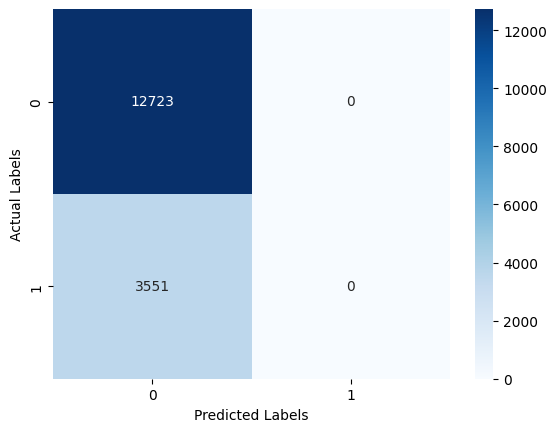

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()